## Data Cleaning to Model_Merge

- 울산선박제원정보, 날씨 정보 맵핑

### 0. 데이터 로드

In [107]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

directory = '../data/'
df = pd.read_csv(directory + '울산_전처리_202122.csv')
dfs = pd.read_csv(directory + '울산_선박제원코드.csv')
dfp = pd.read_csv(directory + 'PORTMIS선박제원정보.csv')

In [108]:
df.head()

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수,입항일시,출항일시,...,Service_Time,접안_대기시간_NumDays,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
0,울산,3EFF5,EVER CHARM,2020.0,1.0,최종,출항,"17,933",1950-01-01 00:00,2020-06-16 20:05,...,25734 days 20:05:00,0,25734,0,0,0,25734,20,37058165,0.000000
1,울산,3EFF5,EVER CHARM,2020.0,1.0,최종,출항,"17,933",1950-01-01 00:00,2020-06-16 20:05,...,25734 days 20:05:00,0,25734,0,0,0,25734,20,37058165,0.000000
2,울산,3ETC7,EVER CHEER,2020.0,1.0,최종,출항,"17,933",1950-01-01 00:00,2020-07-07 19:42,...,25755 days 19:42:00,0,25755,0,0,0,25755,19,37088382,0.000000
3,울산,3ETC7,EVER CHEER,2020.0,1.0,최종,출항,"17,933",1950-01-01 00:00,2020-07-07 19:42,...,25755 days 19:42:00,0,25755,0,0,0,25755,19,37088382,0.000000
4,울산,3FAW9,ESTEEM HOUSTON,2020.0,1.0,최종,출항,"29,651",1950-01-01 00:00,2020-06-07 15:36,...,1 days 23:06:00,0,1,0,0,10,1,23,2826,0.003539


In [109]:
dfs.columns

Index(['선박국적코드', '선박국적코드명', '총 톤 수', 'IMO 번호', '국제 총톤수', '순 톤수', '내외항구분코드',
       '내외항구분명', '청코드', '청코드명', '선적항 항구 코드', '선적항 항구 코드명', '선적항 국가 코드',
       '선적항 국가 코드명', '선박운영자 국적코드', '선박운영자 국적코드명', '선박운영자 코드', '말소사유명(한글명)',
       '말소사유명(영문명)', '선박 총길이', '선박 너비', '선박건조(재계측)일자', '선박 흘수', '선박 깊이',
       '선박명(영문명)', '선박명(한글)', '선박 길이', '선박 번호', '선박 종류', '선박 종류명', '유조선이중선체여부',
       '호출부호', '선주국적코드명', '톤수증서구분', '톤수증서구분명', '운항형태코드명', '재화중량', '전호출부호',
       '변경유무'],
      dtype='object')

### 1. 선박제원 merge

#### 울산 선박제원정도 merge

In [110]:
dfs

,선박국적코드,선박국적코드명,총 톤 수,IMO 번호,국제 총톤수,순 톤수,내외항구분코드,내외항구분명,청코드,청코드명,...,선박 종류명,유조선이중선체여부,호출부호,선주국적코드명,톤수증서구분,톤수증서구분명,운항형태코드명,재화중량,전호출부호,변경유무
0,PA,파나마,75519.0,9262728,75519.0,29555.0,1,외항,020,부산,...,풀컨테이너선,N,H8TS,NaN,1,NaN,정기,0.00,NaN,9262728
1,SL,시에라 리온,1334.0,8514124,1334.0,717.0,1,외항,020,부산,...,일반화물선,NaN,9LU2560,중국,1,NaN,부정기,NaN,V6LM,XUXN3
2,CY,사이프러스,33042.0,9594420,33042.0,19132.0,1,외항,200,동해,...,산물선(벌크선),NaN,5BFS3,사이프러스,1,NaN,부정기,0.00,NaN,9594420
3,KR,대한민국,78.0,NaN,78.0,78.0,2,내항,620,여수,...,석유제품 운반선,N,020540,대한민국,2,NaN,부정기,156.46,NaN,020540
4,KR,대한민국,8.0,NaN,NaN,8.0,2,내항,610,목포,...,기타선,N,104885,NaN,2,NaN,부정기,8.00,NaN,104885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22790,PA,파나마,36518.0,9726516,36518.0,21292.0,1.0,외항,20.0,부산,...,산물선(벌크선),N,3ERH8,파나마,1,NaN,부정기,0.00,NaN,3ERH8
22791,NO,노르웨이,21897.0,9127667,21897.0,12597.0,1.0,외항,30.0,인천,...,케미칼 운반선,N,LAWZ7,NaN,1,NaN,부정기,NaN,A8XY3,9127667
22792,HK,홍콩,32540.0,9755464,32540.0,19282.0,1.0,외항,820.0,울산,...,산물선(벌크선),NaN,VRPT5,홍콩,1,NaN,부정기,NaN,NaN,9755464
22793,DK,덴마크,92198.0,9146455,92198.0,53625.0,1.0,외항,20.0,부산,...,풀컨테이너선,N,OZOK2,NaN,1,NaN,정기,0.00,NaN,9146455


In [111]:
cols = ['선박국적코드','총 톤 수','국제 총톤수', '순 톤수', '내외항구분코드',
       '내외항구분명', '청코드', '청코드명', '선적항 항구 코드', '선적항 항구 코드명', '선적항 국가 코드',
       '선적항 국가 코드명','선박 총길이', '선박 너비','선박 번호', '선박 종류', '선박 종류명','호출부호']

In [112]:
dfs = dfs[cols]

In [113]:
merged = pd.merge(df,dfs,on = '호출부호',how = 'left')

In [114]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144006 entries, 0 to 144005
Data columns (total 59 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   항명                    144006 non-null  object 
 1   호출부호                  144006 non-null  object 
 2   선박명                   144006 non-null  object 
 3   입항횟수_연도               144006 non-null  float64
 4   입항횟수_횟수               144006 non-null  float64
 5   구분                    144006 non-null  object 
 6   입출                    144006 non-null  object 
 7   총톤수                   144006 non-null  object 
 8   입항일시                  144006 non-null  object 
 9   출항일시                  144006 non-null  object 
 10  수리일시                  143968 non-null  object 
 11  항해구분                  144006 non-null  object 
 12  계선장소_코드               144006 non-null  object 
 13  계선장소_숫자               144006 non-null  int64  
 14  계선장소명                 144006 non-null  object 
 15  

In [115]:
merged.head()

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수,입항일시,출항일시,...,청코드명,선적항 항구 코드,선적항 항구 코드명,선적항 국가 코드,선적항 국가 코드명,선박 총길이,선박 너비,선박 번호,선박 종류,선박 종류명
0,울산,3EFF5,EVER CHARM,2020.0,1.0,최종,출항,"17,933",1950-01-01 00:00,2020-06-16 20:05,...,울산,PTY,"PANAMA, CIUDAD DE",PA,파나마,164.9,27.4,NaN,78,신조선
1,울산,3EFF5,EVER CHARM,2020.0,1.0,최종,출항,"17,933",1950-01-01 00:00,2020-06-16 20:05,...,울산,PTY,"PANAMA, CIUDAD DE",PA,파나마,164.9,27.4,NaN,78,신조선
2,울산,3ETC7,EVER CHEER,2020.0,1.0,최종,출항,"17,933",1950-01-01 00:00,2020-07-07 19:42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,울산,3ETC7,EVER CHEER,2020.0,1.0,최종,출항,"17,933",1950-01-01 00:00,2020-07-07 19:42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,울산,3FAW9,ESTEEM HOUSTON,2020.0,1.0,최종,출항,"29,651",1950-01-01 00:00,2020-06-07 15:36,...,울산,PTY,"PANAMA, CIUDAD DE",PA,파나마,183.1,32.2,NaN,52,석유제품 운반선


In [116]:
nott = merged[merged['선박 종류명'].isnull()]

In [117]:
len(nott['선박명'].unique())

2201

#### PORTMIS 선박제원정보 merge

In [118]:
display(dfs.columns)
display(dfp.columns)

Index(['선박국적코드', '총 톤 수', '국제 총톤수', '순 톤수', '내외항구분코드', '내외항구분명', '청코드', '청코드명',
       '선적항 항구 코드', '선적항 항구 코드명', '선적항 국가 코드', '선적항 국가 코드명', '선박 총길이', '선박 너비',
       '선박 번호', '선박 종류', '선박 종류명', '호출부호'],
      dtype='object')

Index(['호출부호', '총톤수', '재화중량톤수', '선박제원(총길이, m)', '선박제원(너비, m)', '만재흘수(m)',
       '깊이(m)', '길이1(m)', '선박국적(code)', '선박국적(이름)'],
      dtype='object')

In [119]:
dfp

,호출부호,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),선박국적(code),선박국적(이름)
0,3EFF5,"17,933","22,382",172.07,27.4,9.8,14.300,164.90,PA,파나마
1,3ETC7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3FAW9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3FKA6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3FWO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7437,3E3380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7438,SVVR,"85,206","163,759",274.20,50,17.0,23.100,265.07,GR,그리스
7439,V7A4918,"30,560","49,996",184.90,32.2,12.7,19.115,178.00,MH,제도
7440,VRMO4,"32,377","58,044",190.00,32.3,12.9,18.000,185.80,HK,홍콩


In [120]:
merged_2 = pd.merge(df,dfp,on = '호출부호',how = 'left')

In [121]:
merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143913 entries, 0 to 143912
Data columns (total 51 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   항명                    143913 non-null  object 
 1   호출부호                  143913 non-null  object 
 2   선박명                   143913 non-null  object 
 3   입항횟수_연도               143913 non-null  float64
 4   입항횟수_횟수               143913 non-null  float64
 5   구분                    143913 non-null  object 
 6   입출                    143913 non-null  object 
 7   총톤수_x                 143913 non-null  object 
 8   입항일시                  143913 non-null  object 
 9   출항일시                  143913 non-null  object 
 10  수리일시                  143875 non-null  object 
 11  항해구분                  143913 non-null  object 
 12  계선장소_코드               143913 non-null  object 
 13  계선장소_숫자               143913 non-null  int64  
 14  계선장소명                 143913 non-null  object 
 15  

In [122]:
nott_2 = merged_2[merged_2['선박제원(총길이, m)'].isnull()]

In [123]:
len(nott_2['호출부호'].unique())

899

#### PORTMIS선박제원정보 결측값 울산선박제원정보 확인

In [124]:
nott_2['호출부호'].unique()

array(['3ETC7', '3FAW9', '3FKA6', '3FWO', '9HA5169', 'D5TN5', 'D5TN6',
       'D5TN8', 'D5VG4', 'D5VP9', 'D5XY8', 'V7A2812', 'V7A2813',
       'V7A2815', '055755', 'D9RT', '995696', 'DSNA8', 'DSPO9', 'T8A2568',
       'V3VF', '150074', '110069', '3FKQ2', 'V7A2292', 'S6BK3', 'V3ZW5',
       'V3PV2', '174810', 'BAKC', 'VRDD8', 'DSFD8', '120068', 'V7GJ4',
       'D7SC', '130095', 'V7A2251', 'DSRE7', '071242', '040438', '105245',
       '038217', 'DSAG', '5BTH3', 'D9WW', 'V7IV7', '130093', 'VRNZ5',
       'DSDB8', '134814', 'C6CH6', 'DSFW5', 'DSRN9', '130051', '090211',
       'DSDD6', 'HPBS', '076548', '100830', 'DSEA5', '124810', 'V7OH4',
       '080568', '9V5322', 'V7SU7', '3FPA2', '3FDS5', '134809', 'DSDD7',
       '9V9225', '3FMR8', 'DSQT8', '9V3453', 'V7OI3', '960823', 'DSQW6',
       'DSQY3', 'DSEN2', '120066', 'DSQK8', '000308', '3EZP6', '090831',
       'VRAO2', '130096', 'D9HA', '3EUB2', 'D8RM', 'S6CQ8', 'DSPJ6',
       '3EBB6', '9V5408', 'V7EO2', '3FCG7', '130008', 'MAQR7', '9LU

In [125]:
len(nott_2['선박명'].unique())

920

In [126]:
common = nott_2[nott_2['호출부호'].isin(dfs['호출부호'])]['호출부호'].unique()

In [127]:
len(common)

738

#### Portmis 데이터 기준 결측값들을 울산선박제원정보 데이터에서 채우기

In [128]:
temp = merged_2.copy()

In [130]:
drop_cols = ['총톤수_y','출항_대기시간']
temp = temp.drop(columns = drop_cols)

In [131]:
dfs.columns

Index(['선박국적코드', '총 톤 수', '국제 총톤수', '순 톤수', '내외항구분코드', '내외항구분명', '청코드', '청코드명',
       '선적항 항구 코드', '선적항 항구 코드명', '선적항 국가 코드', '선적항 국가 코드명', '선박 총길이', '선박 너비',
       '선박 번호', '선박 종류', '선박 종류명', '호출부호'],
      dtype='object')

- 선박제원(총길이, m) = 선박 총길이 ( 단위 확인 완료 )
- 선박제원(너비, m) = 선박 너비
- 만재흘수(m) : 허용된 최대 적재량을 실은 선박이 물속에 잠기는 깊이
- 깊이(m)
- 길이1(m)


<Axes: xlabel='선박 총길이', ylabel='Count'>

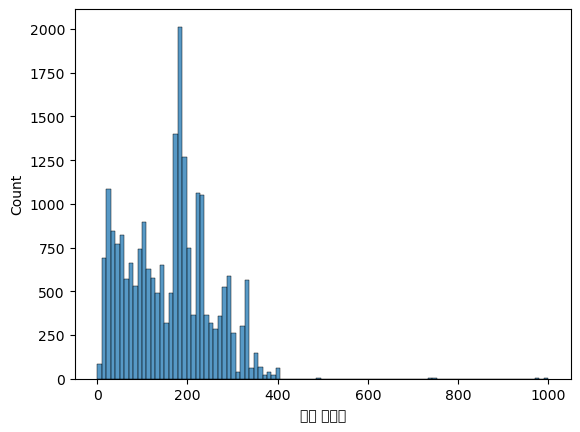

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(dfs['선박 총길이'])

<Axes: xlabel='선박제원(총길이, m)', ylabel='Count'>

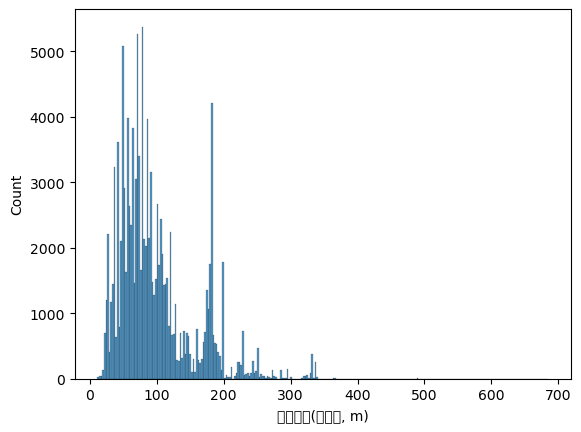

In [133]:
sns.histplot(merged_2['선박제원(총길이, m)'])

In [134]:
dfs['선박 너비'].describe()

count    22794.000000
mean        27.186907
std         38.669711
min          0.000000
25%         15.000000
50%         28.000000
75%         32.300000
max       4802.000000
Name: 선박 너비, dtype: float64

In [135]:
dfp['선박제원(총길이, m)'].describe()

count    6543.000000
mean      164.749719
std        70.838181
min        11.160000
25%       114.990000
50%       176.100000
75%       199.000000
max       685.000000
Name: 선박제원(총길이, m), dtype: float64

In [136]:
selected_columns = ['호출부호', '선박 총길이', '선박 너비']
selected_dfs = dfs[selected_columns]

In [137]:
merged_data = pd.merge(temp, selected_dfs, on='호출부호', how='left')

In [138]:
merged_data['선박제원(총길이, m)'] = merged_data['선박제원(총길이, m)'].fillna(merged_data['선박 총길이'])
merged_data['선박제원(너비, m)'] = merged_data['선박제원(너비, m)'].fillna(merged_data['선박 너비'])

In [139]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144006 entries, 0 to 144005
Data columns (total 51 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   항명                    144006 non-null  object 
 1   호출부호                  144006 non-null  object 
 2   선박명                   144006 non-null  object 
 3   입항횟수_연도               144006 non-null  float64
 4   입항횟수_횟수               144006 non-null  float64
 5   구분                    144006 non-null  object 
 6   입출                    144006 non-null  object 
 7   총톤수_x                 144006 non-null  object 
 8   입항일시                  144006 non-null  object 
 9   출항일시                  144006 non-null  object 
 10  수리일시                  143968 non-null  object 
 11  항해구분                  144006 non-null  object 
 12  계선장소_코드               144006 non-null  object 
 13  계선장소_숫자               144006 non-null  int64  
 14  계선장소명                 144006 non-null  object 
 15  

In [140]:
merged_data.drop(columns = ['선박 총길이','선박 너비'], inplace = True)

#### 입항일시
- 입항일시를 ETA로 파악

In [141]:
df = merged_data.copy()

In [142]:
df['입항일시'] = pd.to_datetime(df['입항일시'])
df['ETA_Year'] = df['입항일시'].dt.year
df['ETA_Month'] = df['입항일시'].dt.month
df['ETA_Day'] = df['입항일시'].dt.day
df['ETA_Hour'] = df['입항일시'].dt.hour
df['ETA_Minute'] = df['입항일시'].dt.minute

In [143]:
df.columns

Index(['항명', '호출부호', '선박명', '입항횟수_연도', '입항횟수_횟수', '구분', '입출', '총톤수_x', '입항일시',
       '출항일시', '수리일시', '항해구분', '계선장소_코드', '계선장소_숫자', '계선장소명', '선박용도', '순번',
       '시설사용횟수', '신고톤수', '지정시설_코드', '지정시설_번호', '지정시설명', '지정일시(FROM)',
       '지정일시(TO)', '사용목적명', '예보일시', '허가유무', '접안_대기시간', 'Service_Time_End',
       'Anchor', 'Service_Time_Start', 'Service_Time', '접안_대기시간_NumDays',
       'Service_Time_NumDays', '접안_대기시간_일', '접안_대기시간_시간', '접안_대기시간_분',
       'Service_Time_일', 'Service_Time_시간', 'Service_Time_분', '대기율', '재화중량톤수',
       '선박제원(총길이, m)', '선박제원(너비, m)', '만재흘수(m)', '깊이(m)', '길이1(m)',
       '선박국적(code)', '선박국적(이름)', 'ETA_Year', 'ETA_Month', 'ETA_Day',
       'ETA_Hour', 'ETA_Minute'],
      dtype='object')

### 2. 해양기상데이터 merge

In [144]:
wt20 = pd.read_csv(directory + '2020(울산해양기상).csv')
wt21= pd.read_csv(directory + '2021(울산해양기상).csv')
wt22 = pd.read_csv(directory + '2022(울산해양기상).csv')

In [145]:
wt = pd.concat([wt20, wt21, wt22], ignore_index=True)

In [146]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25329 entries, 0 to 25328
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지점           25329 non-null  int64  
 1   일시           25329 non-null  object 
 2   풍속(m/s)      23830 non-null  float64
 3   풍향(deg)      23541 non-null  float64
 4   GUST풍속(m/s)  23890 non-null  float64
 5   현지기압(hPa)    25245 non-null  float64
 6   습도(%)        24733 non-null  float64
 7   기온(°C)       25265 non-null  float64
 8   수온(°C)       24788 non-null  float64
 9   최대파고(m)      25277 non-null  float64
 10  유의파고(m)      25269 non-null  float64
 11  평균파고(m)      25241 non-null  float64
 12  파주기(sec)     25281 non-null  float64
 13  파향(deg)      25284 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 2.7+ MB


In [147]:
wt.drop(columns = '지점', inplace = True)

In [148]:
wt

,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,2020-01-01 0:00,7.6,317.0,10.9,NaN,47.0,3.8,17.5,4.4,3.0,2.1,10.7,36.0
1,2020-01-01 1:00,9.3,330.0,12.2,1028.8,43.0,4.3,17.5,4.2,2.8,2.0,10.7,49.0
2,2020-01-01 2:00,10.8,312.0,14.6,1028.9,45.0,4.5,17.5,5.2,2.5,1.8,10.7,63.0
3,2020-01-01 3:00,12.6,315.0,15.3,1028.5,44.0,4.3,17.4,3.9,2.2,1.5,9.1,48.0
4,2020-01-01 4:00,11.4,317.0,14.4,1028.3,53.0,3.4,17.3,3.5,2.1,1.5,9.1,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25324,2022-12-31 19:00,5.5,316.0,7.6,1027.6,52.0,8.7,16.6,2.1,1.1,0.8,5.3,33.0
25325,2022-12-31 20:00,8.1,312.0,10.2,1027.6,56.0,8.5,16.7,2.2,1.3,0.9,5.3,30.0
25326,2022-12-31 21:00,8.9,309.0,11.7,1027.9,55.0,8.2,16.9,2.2,1.4,1.0,5.3,27.0
25327,2022-12-31 22:00,6.5,295.0,9.5,1027.9,55.0,7.9,16.9,1.6,1.1,0.8,4.9,30.0


#### 입항일시가 범위 밖인 행 제거

In [149]:
df = df[df['ETA_Year'].isin([2020, 2021, 2022])] 

In [150]:
df

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수_x,입항일시,출항일시,...,만재흘수(m),깊이(m),길이1(m),선박국적(code),선박국적(이름),ETA_Year,ETA_Month,ETA_Day,ETA_Hour,ETA_Minute
413,울산,185303,103동성호,2020.0,1.0,최종,출항,498,2020-01-01 00:10:00,2020-01-01 04:50,...,4.1,4.60,55.01,KR,대한민국,2020,1,1,0,10
414,울산,088238,3동주,2020.0,1.0,최종,출항,700,2020-01-01 01:05:00,2020-01-01 08:15,...,3.9,5.35,66.01,KR,대한민국,2020,1,1,1,5
415,울산,DSRB9,SEOHAE GAS,2020.0,1.0,최종,출항,"2,689",2020-01-01 03:05:00,2020-01-01 14:55,...,7.2,7.20,90.10,KR,대한민국,2020,1,1,3,5
416,울산,D7CH,STAR CHALLENGER,2020.0,1.0,최종,출항,"9,955",2020-01-01 03:40:00,2020-01-01 13:30,...,8.2,11.20,135.00,KR,대한민국,2020,1,1,3,40
417,울산,D7SC,SKY CHEMI,2020.0,1.0,최종,출항,"1,772",2020-01-01 04:30:00,2020-01-01 20:40,...,NaN,NaN,NaN,NaN,NaN,2020,1,1,4,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144001,울산,130064,에이원,2022.0,114.0,최종,출항,431,2022-12-31 09:45:00,2022-12-31 16:15,...,4.6,4.60,54.01,KR,대한민국,2022,12,31,9,45
144002,울산,HOXG,SPRING NOTE,2022.0,31.0,최종,출항,"2,579",2022-12-31 10:05:00,2022-12-31 20:10,...,6.5,7.20,83.00,PA,파나마,2022,12,31,10,5
144003,울산,200013,유성,2022.0,142.0,최종,출항,"1,998",2022-12-31 15:55:00,2022-12-31 23:15,...,6.0,7.30,79.99,KR,대한민국,2022,12,31,15,55
144004,울산,066597,한성8호,2022.0,22.0,최종,출항,164,2022-12-31 17:55:00,2022-12-31 20:40,...,3.5,3.90,36.70,KR,대한민국,2022,12,31,17,55


In [151]:
wt['일시'] = pd.to_datetime(wt['일시'])
wt['Wt_Year'] = wt['일시'].dt.year
wt['Wt_Month'] = wt['일시'].dt.month
wt['Wt_Day'] = wt['일시'].dt.day
wt['Wt_Hour'] = wt['일시'].dt.hour

In [153]:
wt.head()

,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),Wt_Year,Wt_Month,Wt_Day,Wt_Hour
0,2020-01-01 00:00:00,7.6,317.0,10.9,NaN,47.0,3.8,17.5,4.4,3.0,2.1,10.7,36.0,2020,1,1,0
1,2020-01-01 01:00:00,9.3,330.0,12.2,1028.8,43.0,4.3,17.5,4.2,2.8,2.0,10.7,49.0,2020,1,1,1
2,2020-01-01 02:00:00,10.8,312.0,14.6,1028.9,45.0,4.5,17.5,5.2,2.5,1.8,10.7,63.0,2020,1,1,2
3,2020-01-01 03:00:00,12.6,315.0,15.3,1028.5,44.0,4.3,17.4,3.9,2.2,1.5,9.1,48.0,2020,1,1,3
4,2020-01-01 04:00:00,11.4,317.0,14.4,1028.3,53.0,3.4,17.3,3.5,2.1,1.5,9.1,56.0,2020,1,1,4


In [154]:
merged = pd.merge(df, wt, 
                  left_on = ['ETA_Year','ETA_Month', 'ETA_Day', 'ETA_Hour'],
                  right_on = ['Wt_Year','Wt_Month', 'Wt_Day', 'Wt_Hour'],
                  how = 'left')

In [156]:
merged.head()

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수_x,입항일시,출항일시,...,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),Wt_Year,Wt_Month,Wt_Day,Wt_Hour
0,울산,185303,103동성호,2020.0,1.0,최종,출항,498,2020-01-01 00:10:00,2020-01-01 04:50,...,17.5,4.4,3.0,2.1,10.7,36.0,2020.0,1.0,1.0,0.0
1,울산,088238,3동주,2020.0,1.0,최종,출항,700,2020-01-01 01:05:00,2020-01-01 08:15,...,17.5,4.2,2.8,2.0,10.7,49.0,2020.0,1.0,1.0,1.0
2,울산,DSRB9,SEOHAE GAS,2020.0,1.0,최종,출항,"2,689",2020-01-01 03:05:00,2020-01-01 14:55,...,17.4,3.9,2.2,1.5,9.1,48.0,2020.0,1.0,1.0,3.0
3,울산,D7CH,STAR CHALLENGER,2020.0,1.0,최종,출항,"9,955",2020-01-01 03:40:00,2020-01-01 13:30,...,17.4,3.9,2.2,1.5,9.1,48.0,2020.0,1.0,1.0,3.0
4,울산,D7SC,SKY CHEMI,2020.0,1.0,최종,출항,"1,772",2020-01-01 04:30:00,2020-01-01 20:40,...,17.3,3.5,2.1,1.5,9.1,56.0,2020.0,1.0,1.0,4.0


In [157]:
merged.drop(columns = ['Wt_Year','Wt_Month', 'Wt_Day', 'Wt_Hour'], inplace = True)

In [158]:
merged.to_csv(directory + '울산_전처리_ver5.csv',encoding = 'utf-8-sig', index = False)

In [160]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143530 entries, 0 to 143529
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   항명                    143530 non-null  object        
 1   호출부호                  143530 non-null  object        
 2   선박명                   143530 non-null  object        
 3   입항횟수_연도               143530 non-null  float64       
 4   입항횟수_횟수               143530 non-null  float64       
 5   구분                    143530 non-null  object        
 6   입출                    143530 non-null  object        
 7   총톤수_x                 143530 non-null  object        
 8   입항일시                  143530 non-null  datetime64[ns]
 9   출항일시                  143530 non-null  object        
 10  수리일시                  143495 non-null  object        
 11  항해구분                  143530 non-null  object        
 12  계선장소_코드               143530 non-null  object        
 13 